## Analysis Plan 

### Understand the Dataset:
- Load the dataset  and explore its structure and content.
- Check for missing values, outliers, and any data preprocessing requirements.

### Define Key Metrics:
- Identify the key performance indicators (KPIs) relevant to the campaign, such as the number of rides, cost per ride (CPA), and cost per thousand impressions (CPM).

### Benchmarking:
- Compare industry benchmarks for CPA and CPM with the suggested benchmarks from TweetX.
- Use this information to set realistic targets for the campaign.

### Budget Estimation:
- Based on the industry benchmarks and the suggested measurement design, estimate the budget required for the campaign.
- Consider factors like the number of impressions needed, expected click-through rates, and conversion rates.

### ROI Analysis:
- Calculate the potential return on investment (ROI) by estimating the revenue generated from the expected increase in rides and comparing it to the campaign cost.

### Spatial Analysis:
- Analyze the dataset for different cities to identify potential target locations for the TweetX campaign. Consider launching in cities where Bolt has a strong presence or high growth potential.

### Temporal Analysis:
- Explore the dataset over time to identify patterns and trends. Consider seasonality and other temporal factors that might influence the success of the campaign.

### Sensitivity Analysis:
- Perform sensitivity analysis on key variables, such as CPA, CPM, and the budget. Assess how changes in these variables impact the overall success of the campaign.

### Recommendations and Summary:
- Provide clear recommendations based on the analysis, including the suggested budget, measurement design, and potential impact on Bolt's growth in Poland.
- Summarize key findings for stakeholders, ensuring clarity for both data analytics experts and non-experts.

### Additional Assumptions:
#### Assumptions on Conversion Rates:
- Make assumptions about the conversion rates from impressions to rides based on industry standards or any available data.

#### Assumptions on User Behavior:
- If data on user behavior is not provided, make assumptions about how users might respond to the TweetX campaign.

#### Answer 
1) What’s the best way to measure the impact of the campaign? What would be a good data-driven framework?
2) What minimal budget should the campaign have, so that we are able to measure its impact afterwards?
3) What would be the suggested measurement design that the advertising team should follow?


Assumptions:
Conversion Rate Assumption:

We assume a conversion rate of 5%, meaning 5% of impressions result in actual rides.

CPM and CPA Assumptions:
We'll use the provided benchmarks by TweetX for CPM (2€ to 4€) and CPA (6€ to 12€).

Budget Allocation Assumption:
Allocate the budget based on the expected number of impressions needed and the CPM rate.

In [80]:
import sys
from src.data.datafunctions import  DataFunctions
import pandas as pd
import matplotlib.pyplot as plt
from src.visualization.visualize import Visualize
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline


#instances 
data_class = DataFunctions()
vizs = Visualize(rotation= 45)

In [81]:
#load config file
df = data_class.read_data()

In [82]:
df.head()

,Warsaw,Czestochowa,Kielce,Lublin,Bydgoszcz,Katowice,Wroclaw,Rzeszow,Poznan,Szczecin,Krakow,Gdansk,Zabrze
date,,,,,,,,,,,,,
2022-01-01,2074,256,196,212,641,0,168,23,1436,406,501,1716,387
2022-01-02,660,84,123,70,237,0,42,17,765,81,181,562,127
2022-01-03,520,86,176,57,240,0,43,13,748,92,185,579,148
2022-01-04,460,107,140,57,252,0,53,14,657,119,184,560,171
2022-01-05,449,102,161,82,316,0,47,12,666,138,241,762,207


<Figure size 2000x800 with 0 Axes>

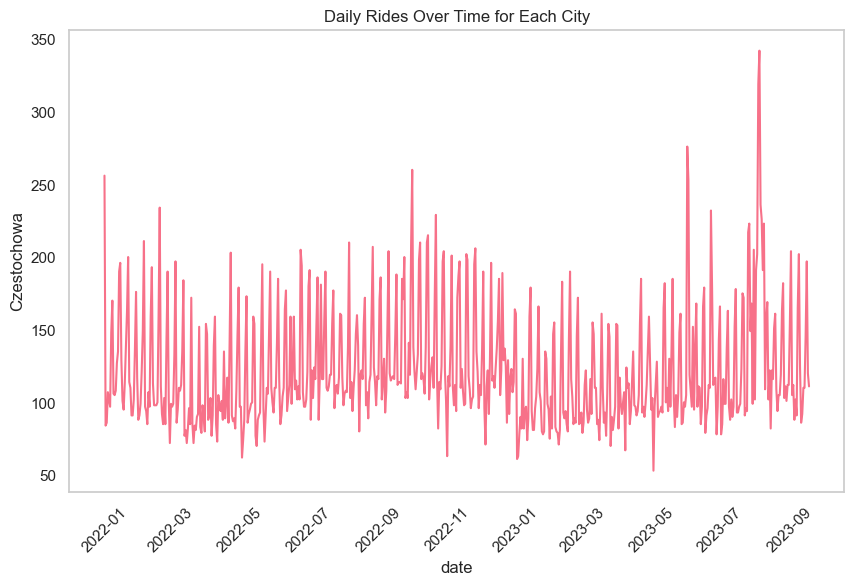

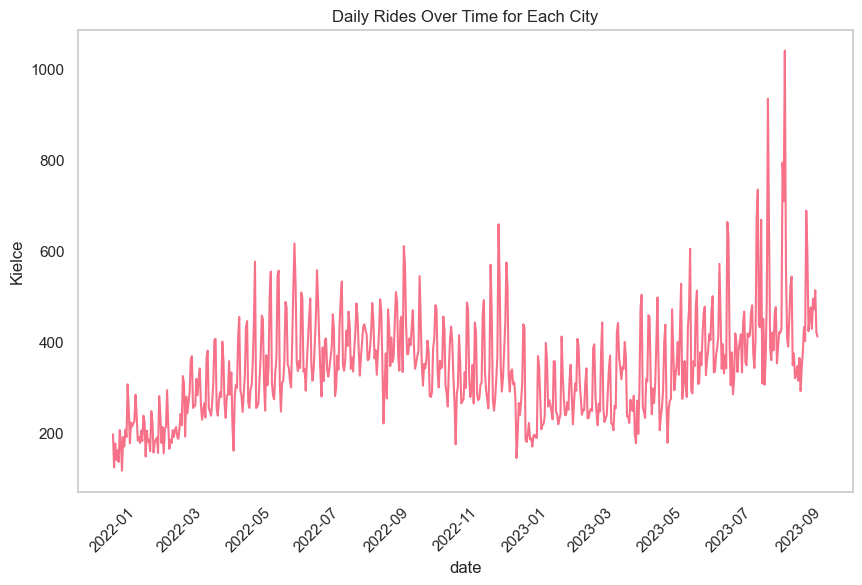

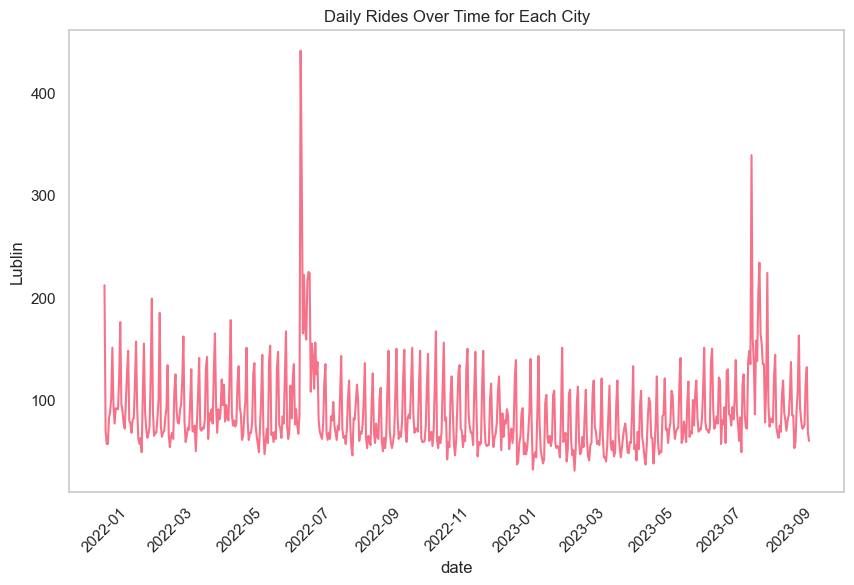

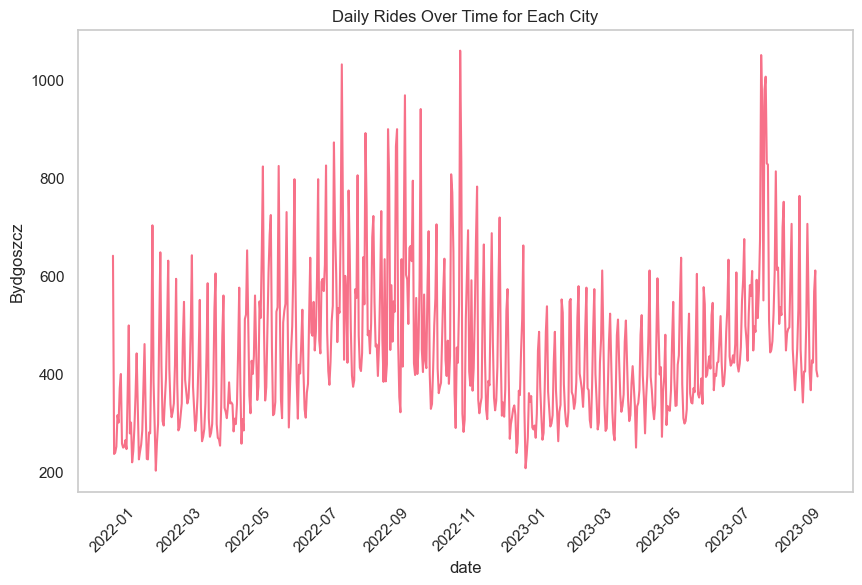

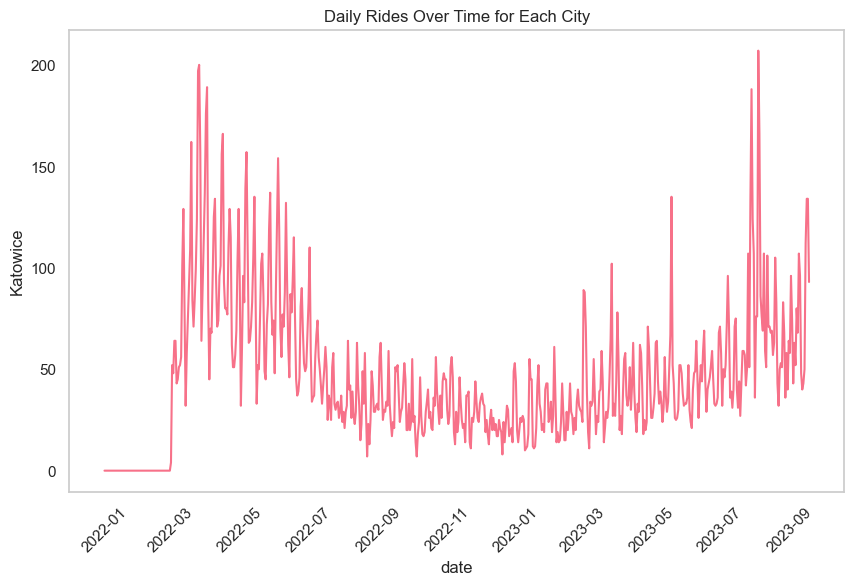

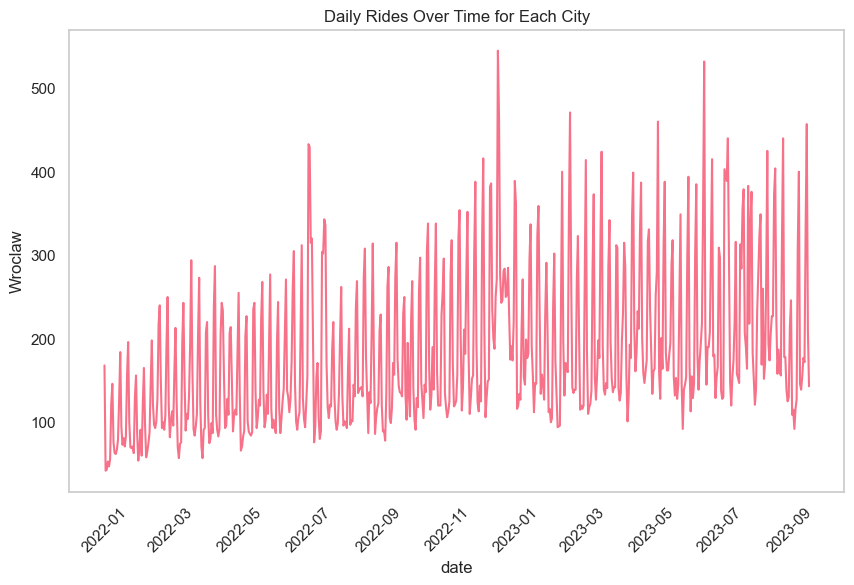

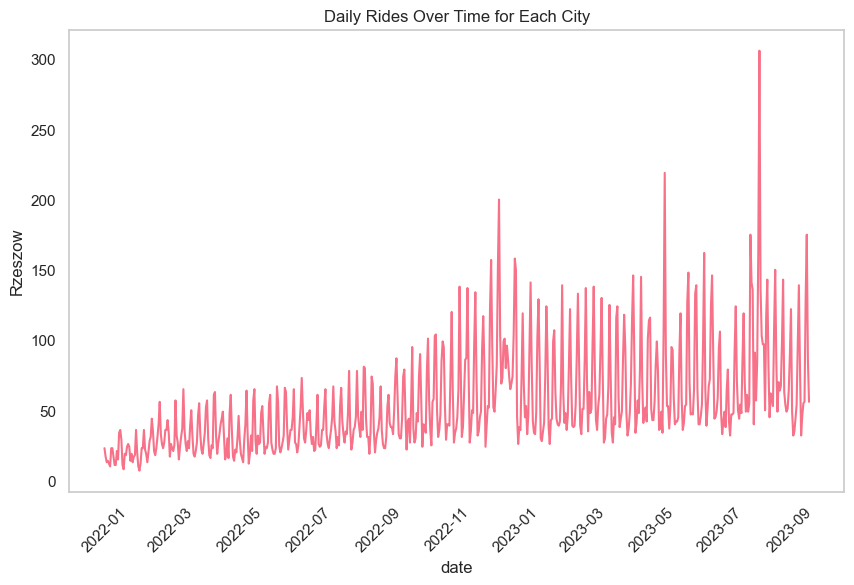

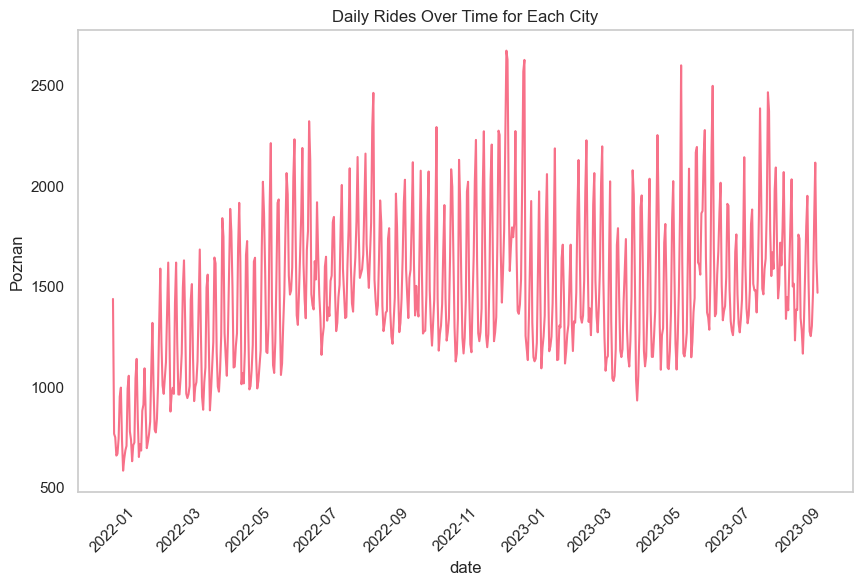

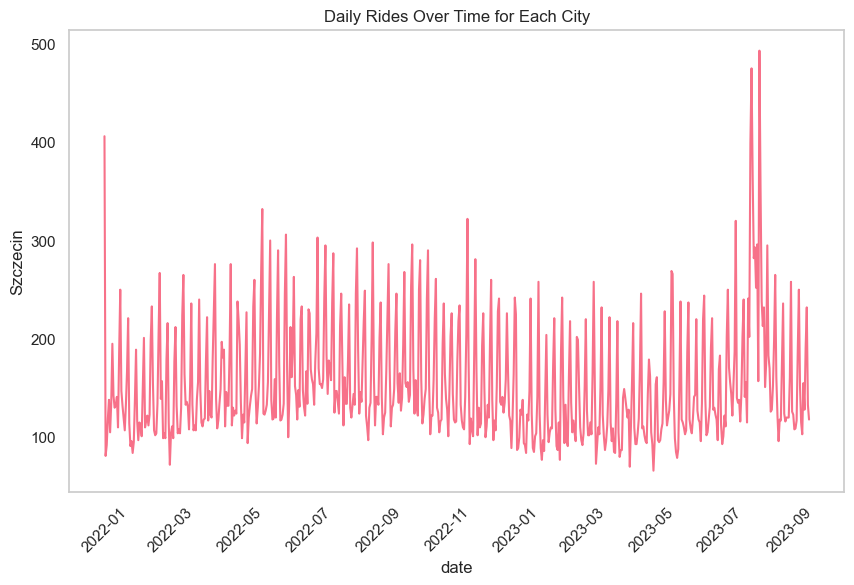

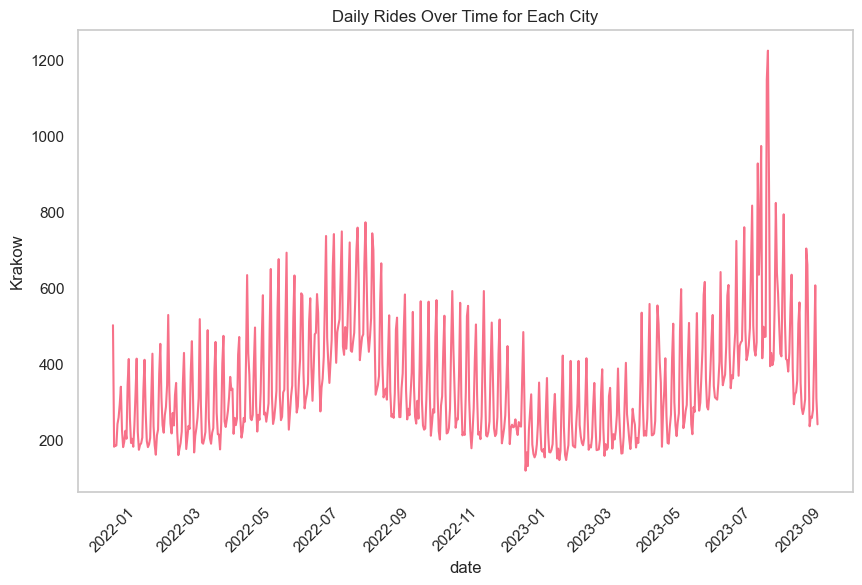

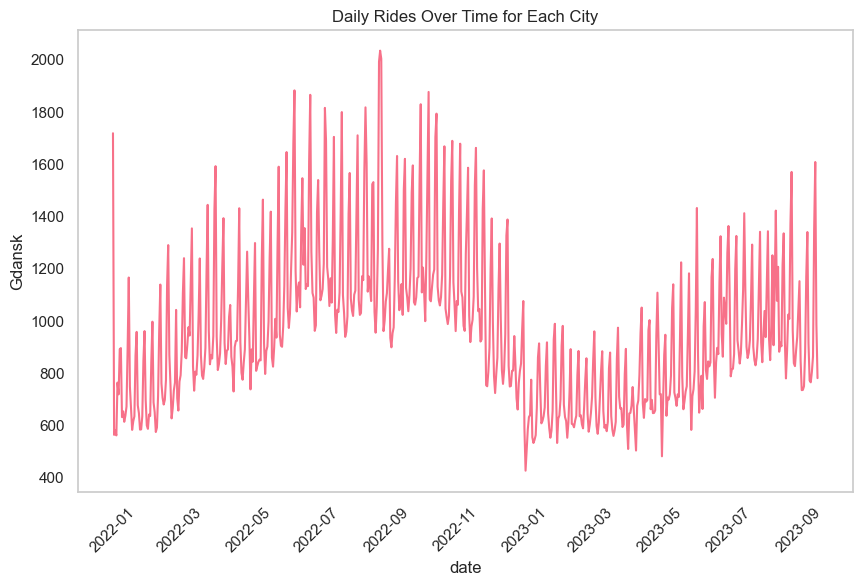

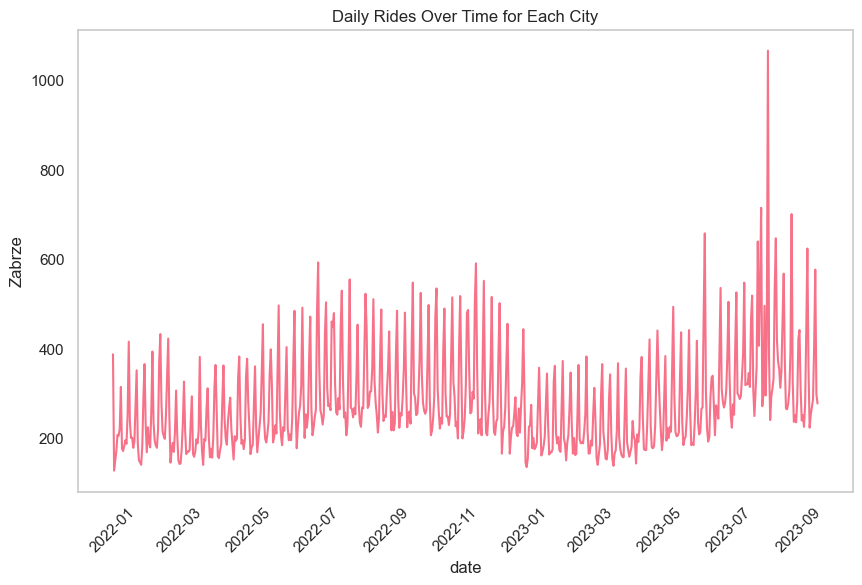

In [83]:

# Visualize rides over time for each city
plt.figure(figsize=(20, 8))
for city in df.columns[1:]:
    vizs.line_plot(
        title='Daily Rides Over Time for Each City',
        x=df.index,
        y=city,
        data=df,
        xlabel=city,
        ylabel='Number of Rides')

## Add Temporal Information and columns for daily percentage change in rides
 - Create 'daily_total_change_all_cities' is created to represent the daily percentage change in the total number of rides across all cities. This is calculated by summing all the numeric columns in each row, calculating the percentage change from the previous row, rounding this to 3 decimal places, and replacing any NaN values with 0.  
- The columns 'day_of_week' and 'month_year' are created to add temporal information to the DataFrame. This can be useful for time series analysis or for identifying patterns or trends over time.  
- The loop over the columns in numeric_df creates a new column for each city that represents the daily percentage change in the number of rides for that specific city. - This is similar to the 'daily_total_change_all_cities' column, but it is calculated for each city individually.  
- Columns with 'daily' or 'date' in their names are skipped in the loop to avoid including the newly created 'daily_total_change_all_cities' column or any other columns that are not relevant to the calculation.

In [84]:
numeric_df = df.select_dtypes(include=[np.number])
df['daily_total_change_all_cities'] = numeric_df.sum(axis=1).pct_change().round(3).fillna(0)
df['day_of_week'] = df.index.day_name()
df['month_year'] = df.index.to_period('M')
for city in numeric_df.columns:
    if 'daily' in city or 'date' in city:
        continue
    df[f'daily_total_change_{city}'] = numeric_df[city].pct_change().round(3).fillna(0)

In [85]:
df.head()

,Warsaw,Czestochowa,Kielce,Lublin,Bydgoszcz,Katowice,Wroclaw,Rzeszow,Poznan,Szczecin,...,daily_total_change_Lublin,daily_total_change_Bydgoszcz,daily_total_change_Katowice,daily_total_change_Wroclaw,daily_total_change_Rzeszow,daily_total_change_Poznan,daily_total_change_Szczecin,daily_total_change_Krakow,daily_total_change_Gdansk,daily_total_change_Zabrze
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2074,256,196,212,641,0,168,23,1436,406,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2022-01-02,660,84,123,70,237,0,42,17,765,81,...,-0.670,-0.630,0.0,-0.750,-0.261,-0.467,-0.800,-0.639,-0.672,-0.672
2022-01-03,520,86,176,57,240,0,43,13,748,92,...,-0.186,0.013,0.0,0.024,-0.235,-0.022,0.136,0.022,0.030,0.165
2022-01-04,460,107,140,57,252,0,53,14,657,119,...,0.000,0.050,0.0,0.233,0.077,-0.122,0.293,-0.005,-0.033,0.155
2022-01-05,449,102,161,82,316,0,47,12,666,138,...,0.439,0.254,0.0,-0.113,-0.143,0.014,0.160,0.310,0.361,0.211


In [86]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Warsaw,626.0,1131.57,387.44,410.00,847.00,1044.50,1379.50,2364.00
Czestochowa,626.0,122.27,39.98,53.00,95.00,110.00,141.75,342.00
Kielce,626.0,341.87,112.34,116.00,264.00,334.00,406.75,1040.00
Lublin,626.0,87.98,39.55,31.00,63.00,77.00,105.00,441.00
Bydgoszcz,626.0,451.69,149.70,203.00,340.00,419.00,533.50,1059.00
Katowice,626.0,46.41,35.52,0.00,24.00,38.50,61.00,207.00
Wroclaw,626.0,183.40,92.11,42.00,117.00,155.00,232.75,545.00
Rzeszow,626.0,55.12,35.74,7.00,31.00,45.00,69.00,306.00
Poznan,626.0,1475.49,377.94,582.00,1224.50,1436.00,1704.00,2671.00
Szczecin,626.0,154.67,59.33,66.00,115.00,135.00,181.00,493.00


- Top Riders: Warsaw reigns supreme (1,131 rides/day), followed by Poznan (1,475) and Gdansk (969).
- Steady Cruisers: Czestochowa maintains stable ridership (122 avg.), while Katowice shows potential (46 avg., investigate outlier).
- Upward Momentum: National rides show a slight uptick (0.02 avg. change), with Poznan and Gdansk leading the charge (positive changes). However, Lublin and Katowice hit the brakes (negative changes).
- Dig Deeper: Uncover city-specific factors for these trends. Segment data by type, user, or time for richer insights. Track changes over time to spot seasonality or campaign impacts.

## CITY SEGMENTATION
--- Segment cities into different categories, such as ***high-growth cities, stable cities, and low-growth cities***, which can help in targeting the campaign effectively. 
    ---- **high growth cities**  are cities with a more than 1000 rides per day and a significant increase in ridership over time
    ---- **Stable cities** are cities with predictable ridership
    ---- **Low growth cities** are cities with less than 100 rides per day and no significant change in ridership over time 

In [87]:
# select Warsaw', 'Czestochowa', 'Kielce', 'Lublin', 'Bydgoszcz', 'Katowice','Wroclaw', 'Rzeszow', 'Poznan','Szczecin', 'Krakow', 'Gdansk','Zabrze' columns

city_df = df[['Warsaw', 'Czestochowa', 'Kielce', 'Lublin', 'Bydgoszcz', 'Katowice','Wroclaw', 'Rzeszow', 'Poznan','Szczecin', 'Krakow', 'Gdansk','Zabrze']]

High-growth cities: ['Warsaw', 'Poznan'], Count: 2
Stable cities: ['Czestochowa', 'Kielce', 'Bydgoszcz', 'Wroclaw', 'Szczecin', 'Krakow', 'Gdansk', 'Zabrze'], Count: 8
Low-growth cities: ['Lublin', 'Katowice', 'Rzeszow'], Count: 3


<Figure size 1000x600 with 0 Axes>

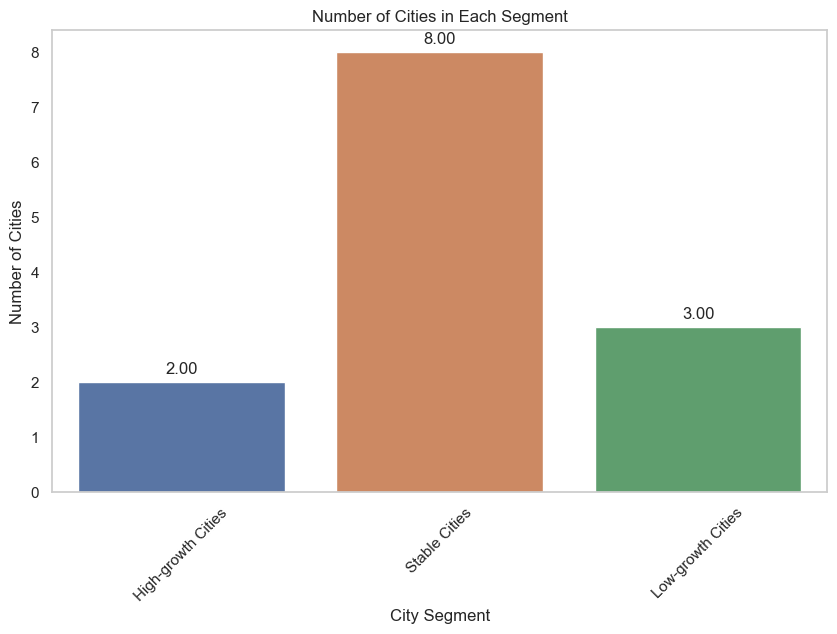

In [88]:
# Calculate the average number of rides per day for each city, select all cities from the df 

avg_rides_per_day = city_df.mean()

# High-growth cities
high_growth_cities = avg_rides_per_day[avg_rides_per_day > 1000].index.tolist()

# Stable cities
stable_cities = avg_rides_per_day[(avg_rides_per_day >= 100) & (avg_rides_per_day <= 1000)].index.tolist()
# Low-growth cities
low_growth_cities = avg_rides_per_day[avg_rides_per_day < 100].index.tolist()

print(f"High-growth cities: {high_growth_cities}, Count: {len(high_growth_cities)}")
print(f"Stable cities: {stable_cities}, Count: {len(stable_cities)}")
print(f"Low-growth cities: {low_growth_cities}, Count: {len(low_growth_cities)}")


# Create a bar plot of the city segments
city_segment_counts = [len(high_growth_cities), len(stable_cities), len(low_growth_cities)]
city_segments = ['High-growth Cities', 'Stable Cities', 'Low-growth Cities']

plt.figure(figsize=(10, 6))
vizs.bar_chart(
    title='Number of Cities in Each Segment',
    x=city_segments,
    y=city_segment_counts,
    data=city_df,
    xlabel='City Segment',
    ylabel='Number of Cities',
output_filepath= " ")

#### Analyse the performance of each segment over time to identify patterns or trends that can inform the campaign strategy. 

<hr>

<Figure size 2000x800 with 0 Axes>

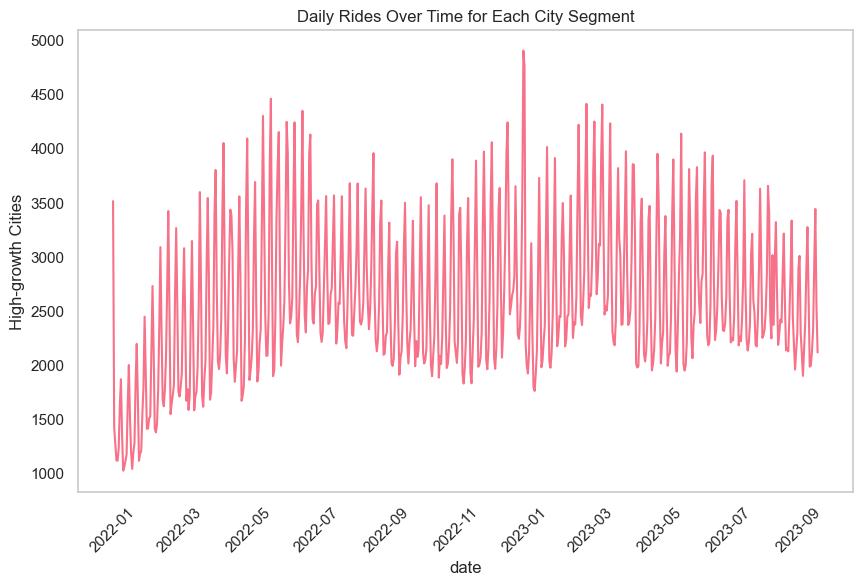

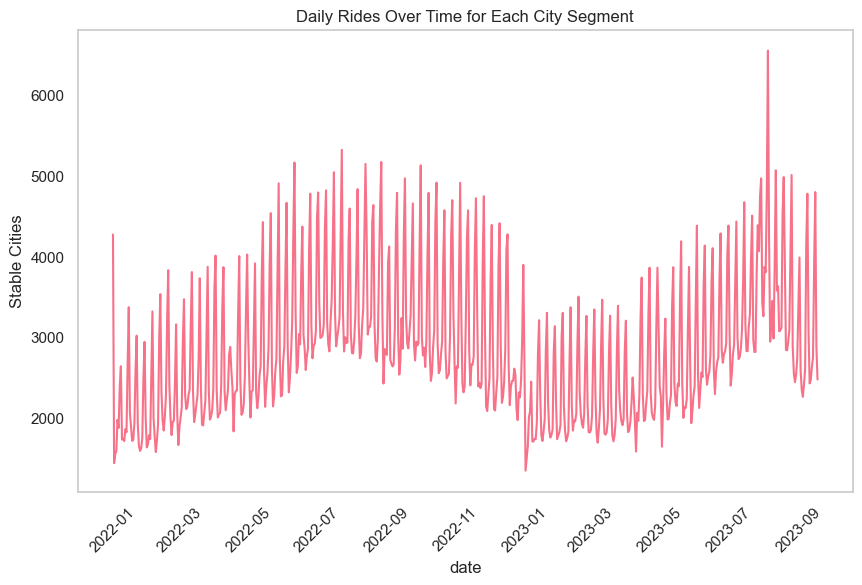

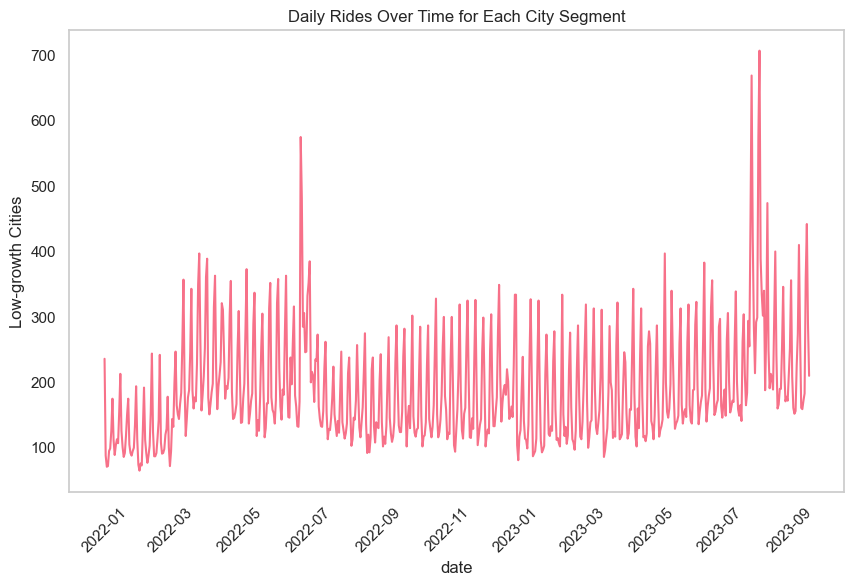

In [89]:

# Create a new DataFrame to store the city segments
city_segment_df = pd.DataFrame(index=city_df.index)

# Add the daily rides for each city to the new DataFrame

city_segment_df['High-growth Cities'] = city_df[high_growth_cities].sum(axis=1)
city_segment_df['Stable Cities'] = city_df[stable_cities].sum(axis=1)
city_segment_df['Low-growth Cities'] = city_df[low_growth_cities].sum(axis=1)
# Visualize the daily rides over time for each city segment
plt.figure(figsize=(20, 8))
for segment in city_segment_df.columns:
    vizs.line_plot(
        title='Daily Rides Over Time for Each City Segment',
        x=city_segment_df.index,
        y=segment,
        data=city_segment_df,
        xlabel='Date',
        ylabel='Number of Rides')
    


#### Plot daily pct change for each city segment 


<Figure size 2000x800 with 0 Axes>

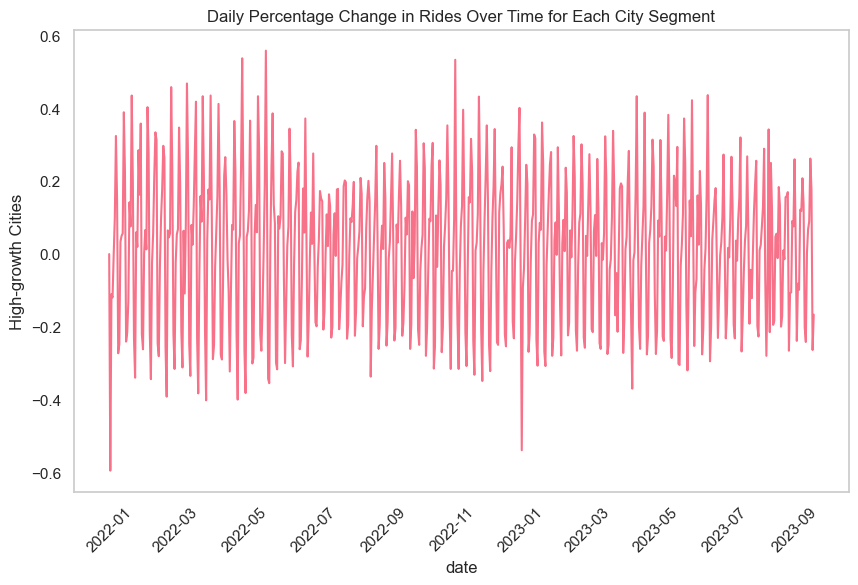

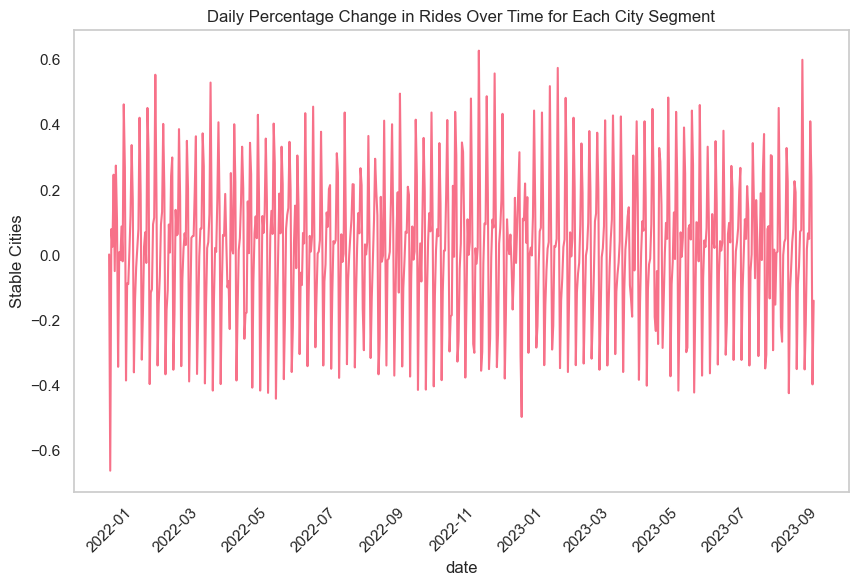

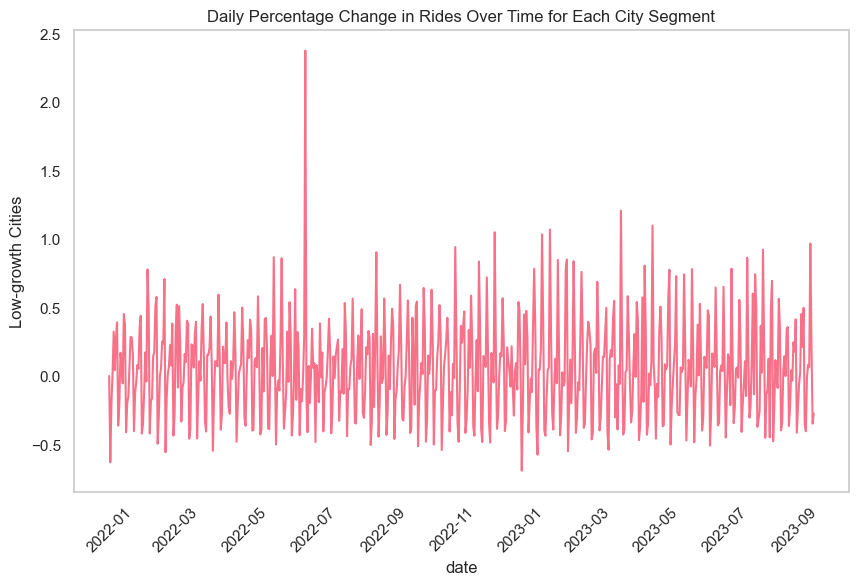

In [90]:
# Create a new DataFrame to store the daily percentage change in rides for each city segment
city_segment_change_df = pd.DataFrame(index=df.index)

# Add the daily percentage change in rides for each city segment to the new DataFrame
city_segment_change_df['High-growth Cities'] = city_segment_df['High-growth Cities'].pct_change().round(3).fillna(0)
city_segment_change_df['Stable Cities'] = city_segment_df['Stable Cities'].pct_change().round(3).fillna(0)

city_segment_change_df['Low-growth Cities'] = city_segment_df['Low-growth Cities'].pct_change().round(3).fillna(0)

# Visualize the daily percentage change in rides over time for each city segment

plt.figure(figsize=(20, 8))

for segment in city_segment_change_df.columns:
    vizs.line_plot(
        title='Daily Percentage Change in Rides Over Time for Each City Segment',
        x=city_segment_change_df.index,
        y=segment,
        data=city_segment_change_df,
        xlabel='Date',
        ylabel='Percentage Change in Rides')

#### Plot Weekly trend  for each city segment 


<Figure size 2000x800 with 0 Axes>

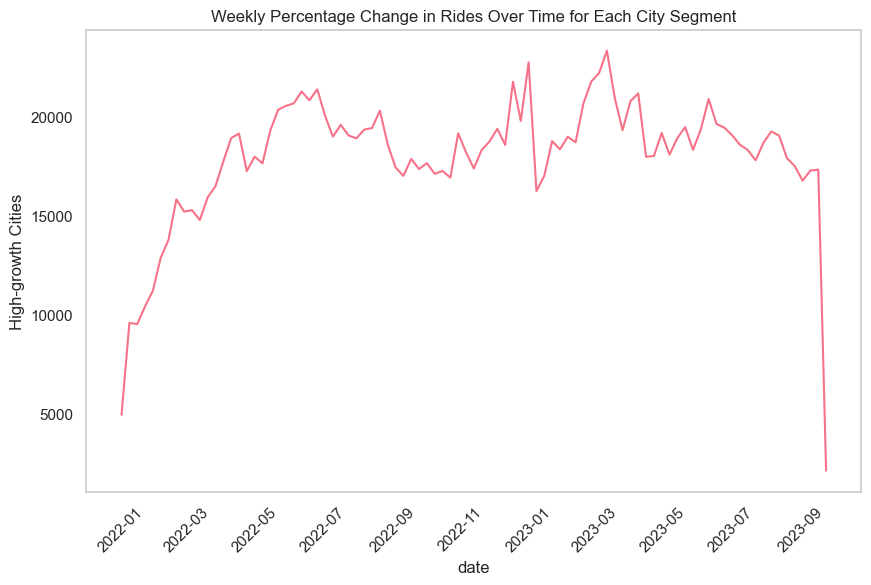

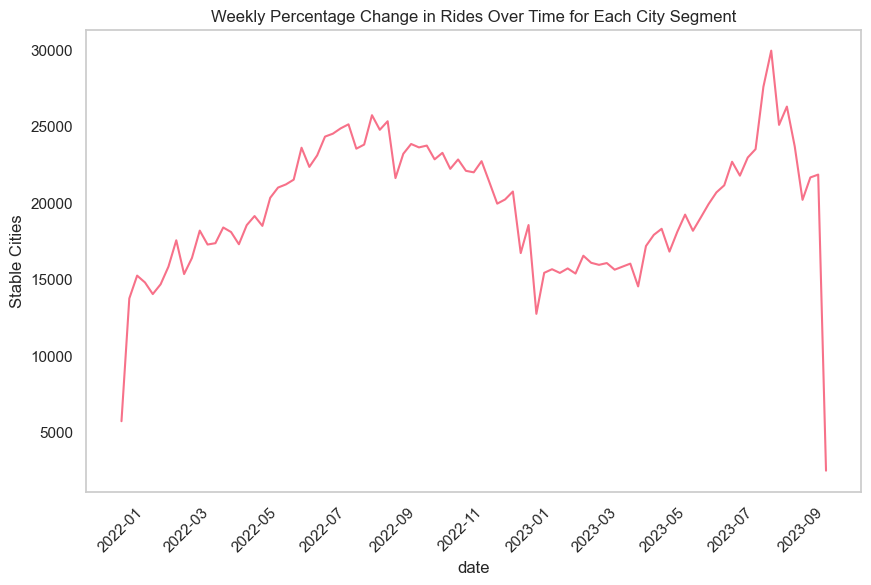

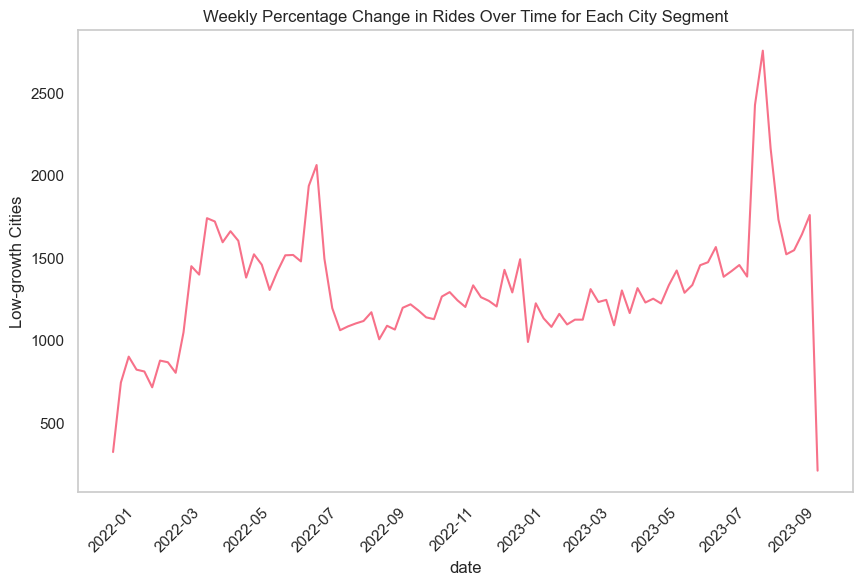

In [91]:
weekly_city_segment_df = city_segment_df.resample('W').sum()

# Visualize the weekly percentage change in rides over time for each city segment

plt.figure(figsize=(20, 8))

for segment in weekly_city_segment_df.columns:
    vizs.line_plot(
        title='Weekly Percentage Change in Rides Over Time for Each City Segment',
        x=weekly_city_segment_df.index,
        y=segment,
        data=weekly_city_segment_df,
        xlabel='Date',
        ylabel='Number of Rides',
        output_filepath=" ")


#### Plot Montly trend  for each city segment 


<Figure size 2000x800 with 0 Axes>

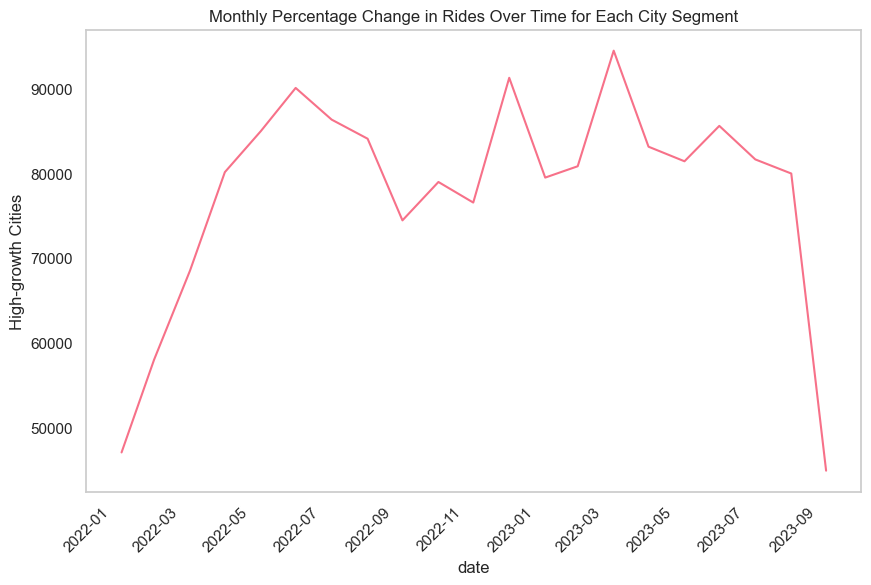

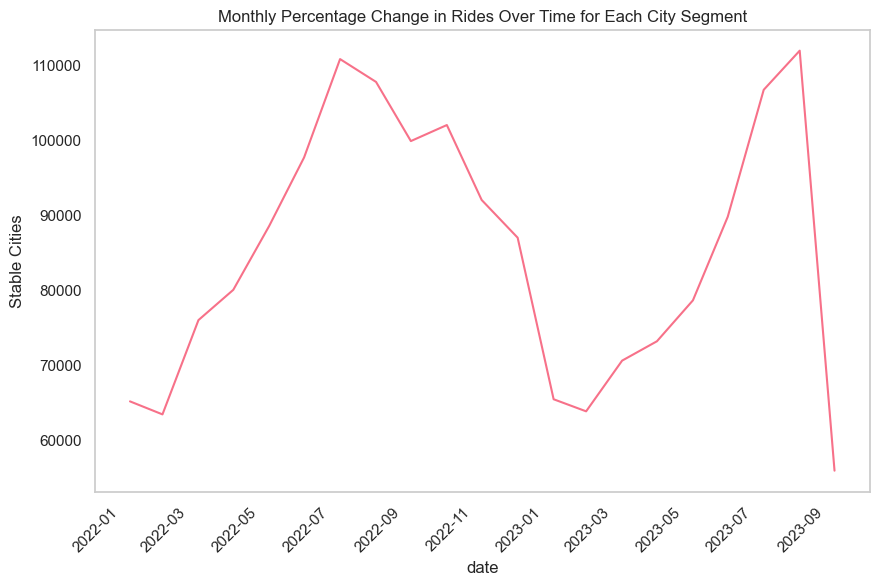

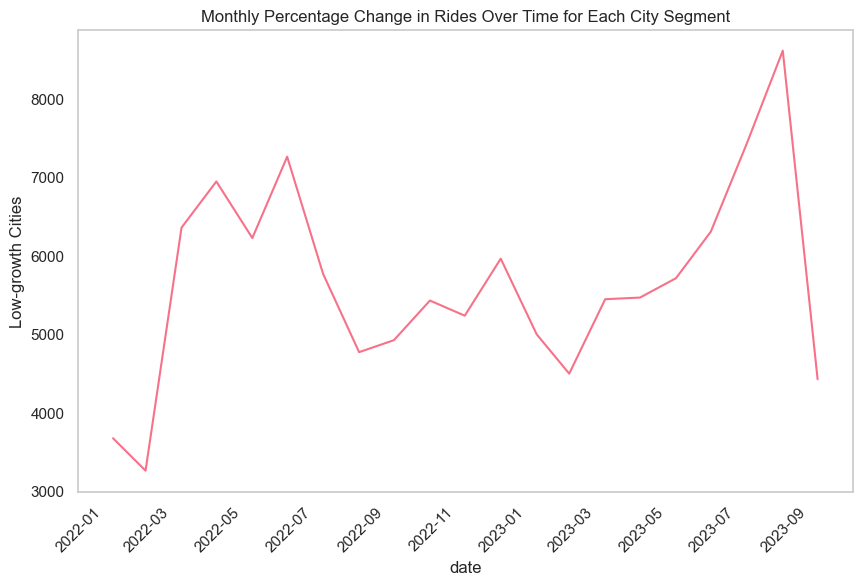

In [92]:
#create a violin plot for  monthly  pct change for each city segment
# Create a new DataFrame to store the monthly percentage change in rides for each city segment
monthly_city_segment_df = city_segment_df.resample('M').sum()


# Visualize the monthly percentage change in rides over time for each city segment

plt.figure(figsize=(20, 8))


for segment in monthly_city_segment_df.columns:
    vizs.line_plot(
        title='Monthly Percentage Change in Rides Over Time for Each City Segment',
        x=monthly_city_segment_df.index,
        y=segment,
        data=monthly_city_segment_df,
        xlabel='Date',
        ylabel='Number of Rides',
        output_filepath=" ")

#### Pct changes for each city segment 

In [93]:
# Create a new DataFrame to store the monthly percentage change in rides for each city segment

monthly_city_segment_change_df = monthly_city_segment_df.pct_change().round(3).fillna(0)



<Figure size 2000x800 with 0 Axes>

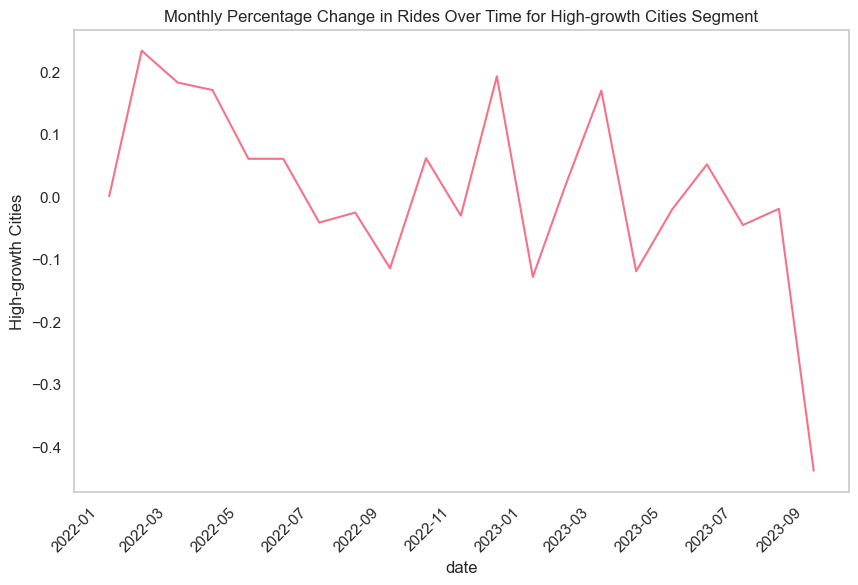

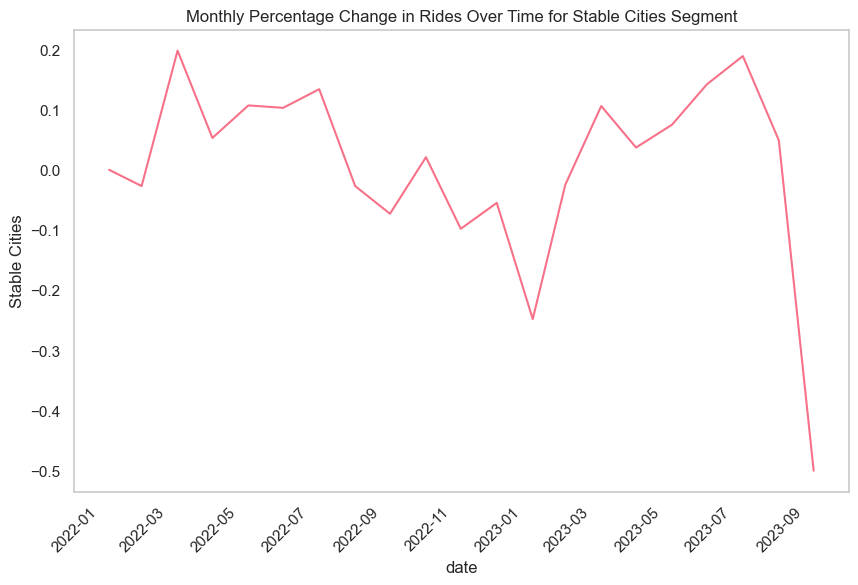

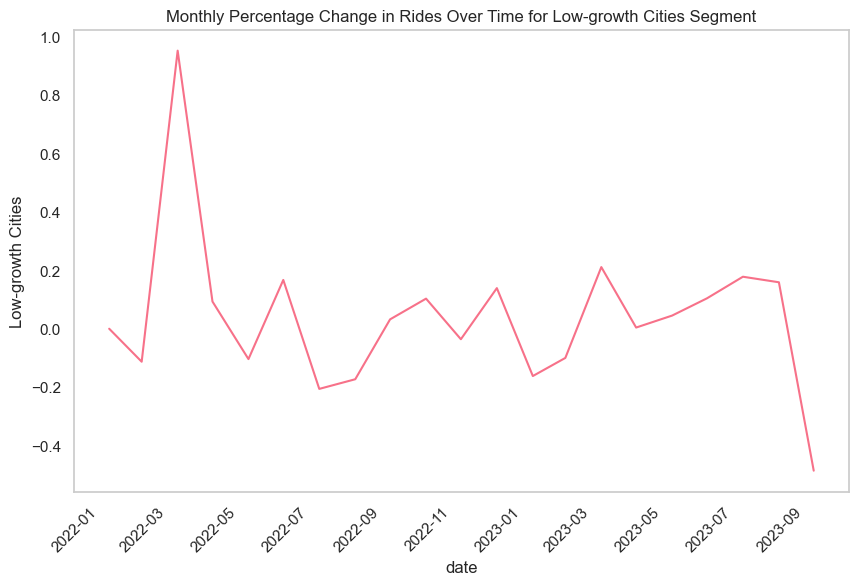

In [94]:
#do a violin plot for the monthly percentage change in rides over time for each city segment, x axis to be mont-yr, add annotation for each city segment 

plt.figure(figsize=(20, 8))

for segment in monthly_city_segment_change_df.columns:
    vizs.line_plot(
        title=f'Monthly Percentage Change in Rides Over Time for {segment} Segment',
        x=monthly_city_segment_change_df.index,
        y=segment,
        data=monthly_city_segment_change_df,
        xlabel='Date',
        ylabel='Percentage Change in Rides',
        output_filepath=" ")

#### plot trendlines for each city segment 

<Figure size 2000x800 with 0 Axes>

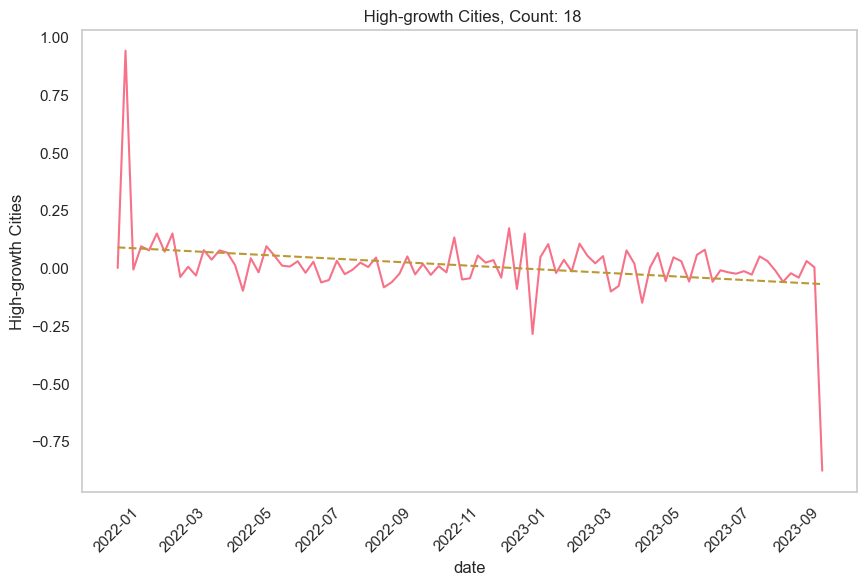

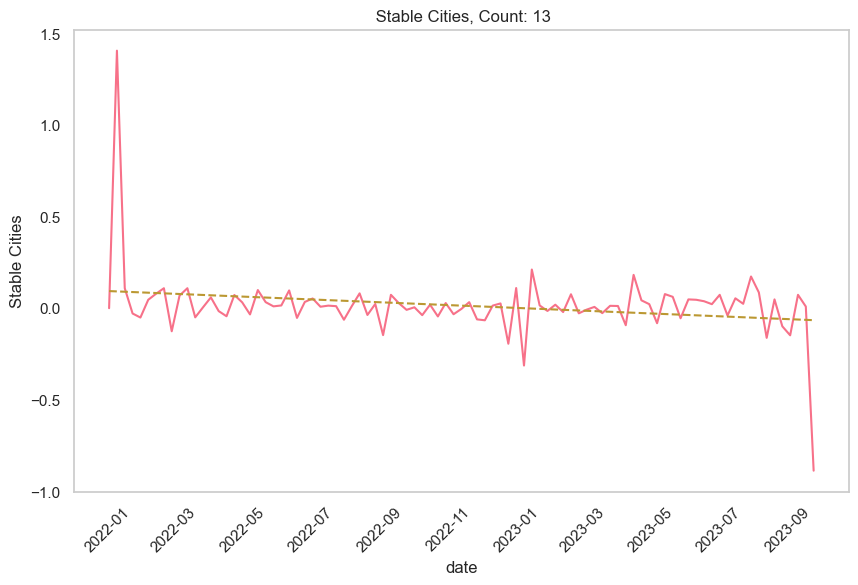

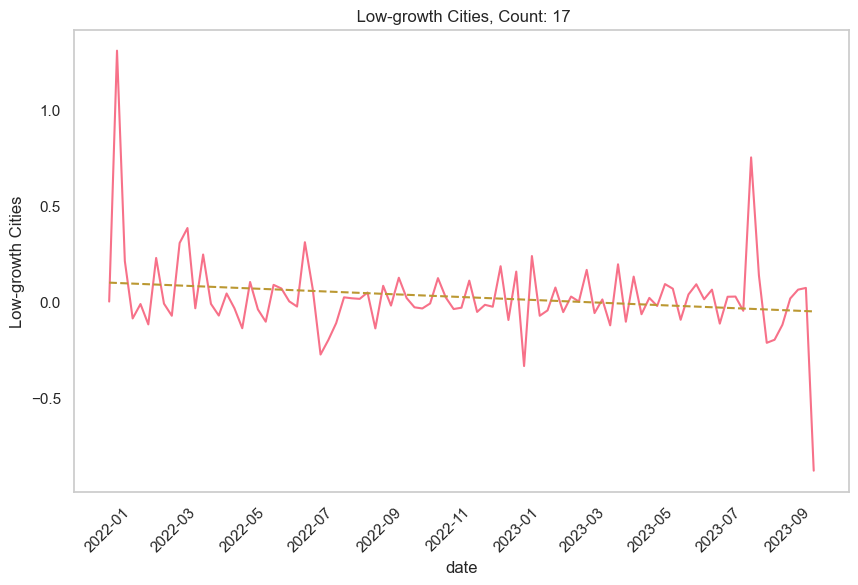

In [95]:
weekly_city_segment_change_df = weekly_city_segment_df.pct_change().round(3).fillna(0)

# Visualize the weekly percentage change in rides over time for each city segment
plt.figure(figsize=(20, 8))

for segment in weekly_city_segment_change_df.columns:
    # Plot the data
    vizs.line_plot(
        title=f" {segment}, Count: {len(segment)}",
        x=weekly_city_segment_change_df.index,
        y=segment,
        data=weekly_city_segment_change_df,
        xlabel='Date',
        ylabel='Percentage Change in Rides')

    # Fit a line to the data
    z = np.polyfit(range(len(weekly_city_segment_change_df.index)), weekly_city_segment_change_df[segment], 1)
    p = np.poly1d(z)

    # Trendline
    plt.plot(weekly_city_segment_change_df.index, p(range(len(weekly_city_segment_change_df.index))), linestyle='--')

#### Statistical analysis 

In [96]:
# Calculate the average percentage change in rides for each city segment 

avg_pct_change = weekly_city_segment_change_df.mean()

# Calculate the standard deviation of the percentage change in rides for each city segment

std_pct_change = weekly_city_segment_change_df.std()

# Print the results

print(f"Average Percentage Change in Rides: {avg_pct_change}")
print(f"Standard Deviation of Percentage Change in Rides: {std_pct_change}")


print("""Notes:
High-growth Cities: The average percentage change in rides for high-growth cities is approximately 0.96%. This indicates a steady increase in the number of rides in these cities. However, the standard deviation is 0.15, which suggests that there is a significant variation in the weekly percentage change in rides. This could be due to various factors such as seasonal trends, promotional campaigns, or changes in market conditions.
Stable Cities: The average percentage change in rides for stable cities is approximately 1.40%. This is higher than the high-growth cities, indicating a more consistent increase in the number of rides. The standard deviation is 0.19, which is slightly higher than the high-growth cities, indicating a higher variation in the weekly percentage change in rides.
Low-growth Cities: The average percentage change in rides for low-growth cities is approximately 2.36%. This is significantly higher than both high-growth and stable cities. However, the standard deviation is also the highest at 0.22, indicating a high level of variation in the weekly percentage change in rides.
""")


Average Percentage Change in Rides: High-growth Cities    0.009560
Stable Cities         0.014011
Low-growth Cities     0.023582
dtype: float64
Standard Deviation of Percentage Change in Rides: High-growth Cities    0.151732
Stable Cities         0.191424
Low-growth Cities     0.219769
dtype: float64
Notes:
High-growth Cities: The average percentage change in rides for high-growth cities is approximately 0.96%. This indicates a steady increase in the number of rides in these cities. However, the standard deviation is 0.15, which suggests that there is a significant variation in the weekly percentage change in rides. This could be due to various factors such as seasonal trends, promotional campaigns, or changes in market conditions.
Stable Cities: The average percentage change in rides for stable cities is approximately 1.40%. This is higher than the high-growth cities, indicating a more consistent increase in the number of rides. The standard deviation is 0.19, which is slightly higher

#### % median change in rides for each city segment

In [97]:

median_pct_change = weekly_city_segment_change_df.median()
print(f'{median_pct_change*100},%')


High-growth Cities    0.8
Stable Cities         1.4
Low-growth Cities     0.1
dtype: float64,%


#### Benchmarking

In [98]:

# Assuming CPM and CPA benchmarks
cpm_low, cpm_high = 2, 4
cpa_low, cpa_high = 6, 12


# Calculate the budget range

impressions_needed = city_df.sum().sum()  # Total impressions for all cities

budget_low = impressions_needed * cpm_low / 1000  # CPM to cost per impression

budget_high = impressions_needed * cpm_high / 1000  # CPM to cost per impression

# Calculate the expected number of rides

expected_rides_low = impressions_needed * (cpa_low / 100) * 0.10  # Assuming a 10% conversion rate

expected_rides_high = impressions_needed * (cpa_high / 100) * 0.10  # Assuming a 10% conversion rate

print(f"Budget Range: {budget_low:.2f}€ - {budget_high:.2f}€")

print(f"Expected Rides Range: {expected_rides_low:.2f} - {expected_rides_high:.2f}")

# Assuming the average profit per ride is 6€

average_profit_per_ride = 6

expected_revenue_low = expected_rides_low * average_profit_per_ride

expected_revenue_high = expected_rides_high * average_profit_per_ride

roi_low = (expected_revenue_low - budget_high) / budget_high * 100

roi_high = (expected_revenue_high - budget_low) / budget_low * 100

print(f"Expected Revenue Range: {expected_revenue_low:.2f}€ - {expected_revenue_high:.2f}€")

print(f"ROI Range: {roi_low:.2f}% - {roi_high:.2f}%")

# Calculate the average cost per ride in the industry benchmark range

min_cpa = 6  # minimum cost per ride

max_cpa = 12  # maximum cost per ride

avg_cpa = (min_cpa + max_cpa) / 2

# Estimate the minimum budget needed for a measurable impact

min_budget = avg_cpa * city_df.sum().sum()  # assuming all cities are targeted

print(f"Minimum budget for a measurable impact: {min_budget:.2f} €")


Budget Range: 7070.65€ - 14141.31€
Expected Rides Range: 21211.96 - 42423.92
Expected Revenue Range: 127271.77€ - 254543.54€
ROI Range: 800.00% - 3500.00%
Minimum budget for a measurable impact: 31817943.00 €



 #### Budget estimation

In [99]:
# Total impressions for all cities
impressions_needed = city_df.sum().sum()

# Assuming CPM and CPA benchmarks
cpm_low, cpm_high = 2, 4
cpa_low, cpa_high = 6, 12

# Conversion rate from impressions to rides
conversion_rate = 0.05 # 5%

# Calculate the budget range
budget_low = impressions_needed * cpm_low / 1000  # CPM to cost per impression
budget_high = impressions_needed * cpm_high / 1000  # CPM to cost per impression

# Calculate the expected number of rides
expected_rides_low = impressions_needed * conversion_rate * (cpa_low / 100)
expected_rides_high = impressions_needed * conversion_rate * (cpa_high / 100)

print(f"Budget Range: {budget_low:.2f}€ - {budget_high:.2f}€")
print(f"Expected Rides Range: {expected_rides_low:.2f} - {expected_rides_high:.2f}")

Budget Range: 7070.65€ - 14141.31€
Expected Rides Range: 10605.98 - 21211.96


In [100]:
#split this minimum budget into the different city segments to allocate the budget effectively. 

# Calculate the average number of rides per day for each city segment

avg_rides_per_day = city_segment_df.mean()

# Calculate the total number of rides for each city segment

total_rides_per_segment = avg_rides_per_day * len(city_segment_df)

# Calculate the percentage of the total budget allocated to each city segment

budget_allocation = total_rides_per_segment / total_rides_per_segment.sum()

# Calculate the budget allocated to each city segment

segment_budget = budget_allocation * min_budget

print(segment_budget)







High-growth Cities    14688153.0
Stable Cities         16062066.0
Low-growth Cities      1067724.0
dtype: float64


#### Budget for each city 

In [128]:
# provide each city  budget allocation, not the segment, but the city, this calculation is with assumption of conversion rate of 5% and the budget allocation to each city segment


# Calculate the average number of rides per day for each city
avg_rides_per_day = city_df.mean()

# Calculate the total number of rides for each city
total_rides_per_city = avg_rides_per_day * len(city_df)

# Calculate the percentage of the total budget allocated to each city

budget_allocation = (total_rides_per_city / total_rides_per_city.sum()).round(2)

# Calculate the budget allocated to each city

city_budget = budget_allocation * min_budget

#from the budget allocattion calculate the roi for each city 

# Calculate the expected number of rides for each city

expected_rides = impressions_needed * conversion_rate * (cpa_low / 100)

# Calculate the expected revenue for each city

expected_revenue = expected_rides * average_profit_per_ride


# Calculate the ROI for each city

roi = (expected_revenue - city_budget) / city_budget * 100

print(roi)


Warsaw        -99.000000
Czestochowa   -90.000000
Kielce        -96.666667
Lublin        -90.000000
Bydgoszcz     -97.500000
Katowice      -80.000000
Wroclaw       -93.333333
Rzeszow       -80.000000
Poznan        -99.230769
Szczecin      -93.333333
Krakow        -96.666667
Gdansk        -98.823529
Zabrze        -96.000000
dtype: float64


#### ROI Analysis

In [115]:
city_budget

,Budget Allocation (€),Expected Revenue (€),ROI (%)
Katowice,261486.0,63635.886,-75.663750
Rzeszow,310563.0,63635.886,-79.509508
Lublin,495675.0,63635.886,-87.161772
Czestochowa,688842.0,63635.886,-90.761904
Szczecin,871407.0,63635.886,-92.697341
Wroclaw,1033254.0,63635.886,-93.841216
Zabrze,1578789.0,63635.886,-95.969323
Kielce,1926090.0,63635.886,-96.696110
Krakow,1961064.0,63635.886,-96.755033
Bydgoszcz,2544831.0,63635.886,-97.499406


In [20]:
# Create a new DataFrame to store the weekly percentage change in rides for each city segment
weekly_city_segment_change_df = weekly_city_segment_df.pct_change().round(3).fillna(0)
weekly_city_segment_change_df.head()

,High-growth Cities,Stable Cities,Low-growth Cities
date,,,
2022-01-02,0.000,0.000,0.000
2022-01-09,0.941,1.406,1.307
2022-01-16,-0.007,0.109,0.211
2022-01-23,0.094,-0.029,-0.088
2022-01-30,0.076,-0.051,-0.013


<Figure size 2000x800 with 0 Axes>

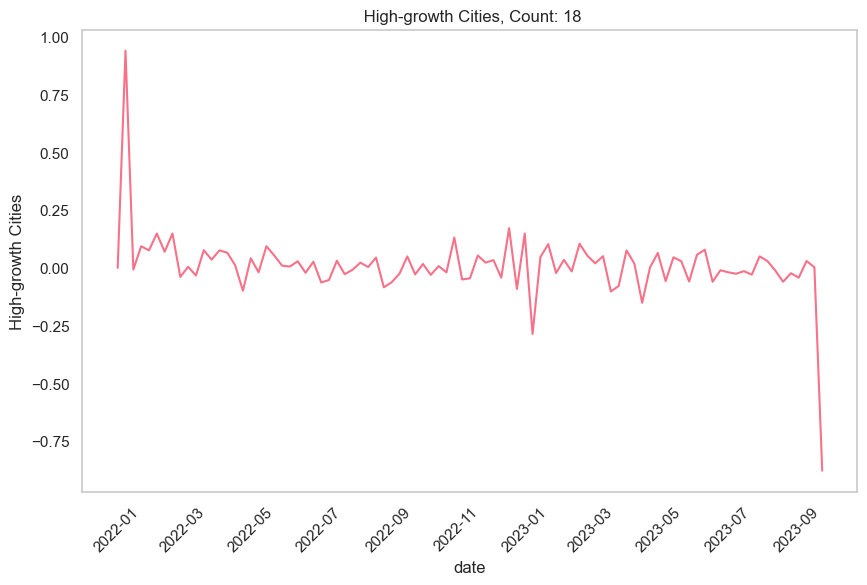

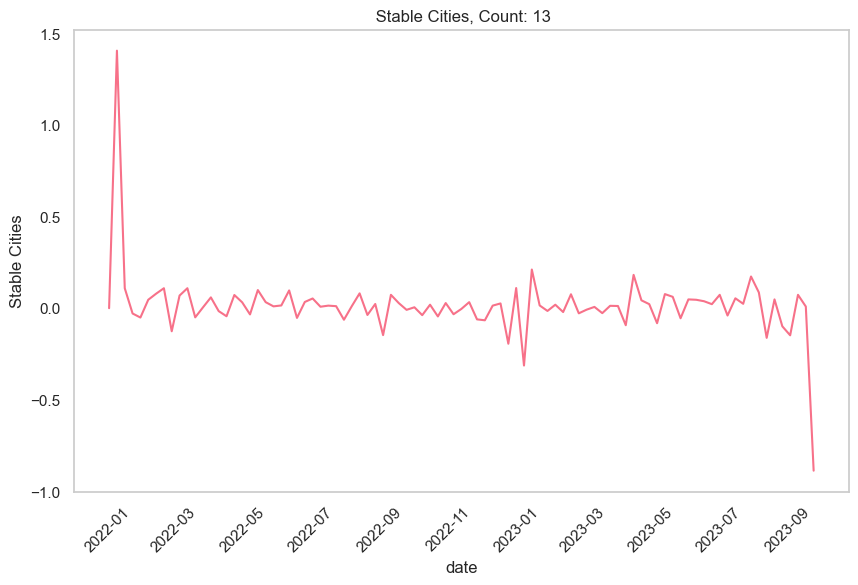

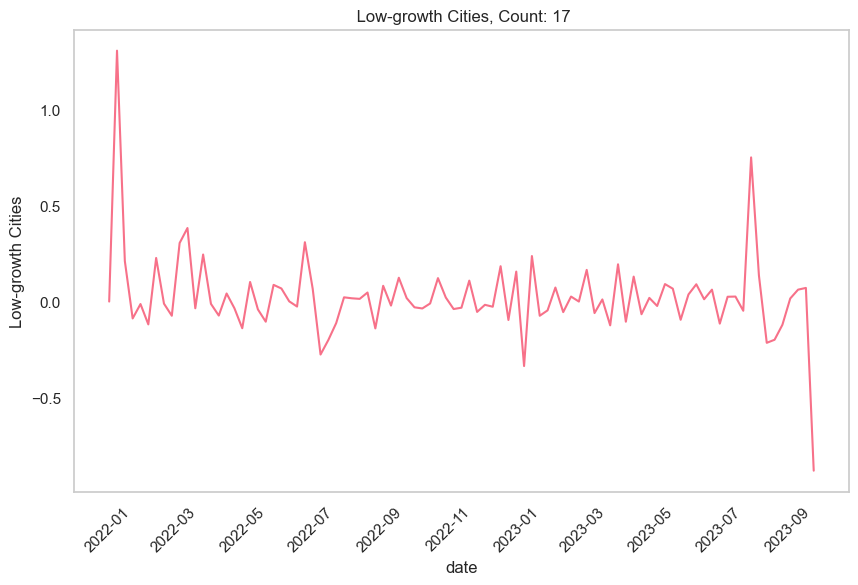

In [19]:
# Visualize the weekly percentage change in rides over time for each city segment

plt.figure(figsize=(20, 8))

for segment in weekly_city_segment_change_df.columns:
    vizs.line_plot(
        title=f" {segment}, Count: {len(segment)}",
        x=weekly_city_segment_change_df.index,
        y=segment,
        data=weekly_city_segment_change_df,
        xlabel='Date',
        ylabel='Percentage Change in Rides')

In [5]:
# Assuming CPM and CPA benchmarks
cpm_low, cpm_high = 2, 4
cpa_low, cpa_high = 6, 12

# Calculate the budget range
impressions_needed = df.sum().sum()  # Total impressions for all cities
budget_low = impressions_needed * cpm_low / 1000  # CPM to cost per impression
budget_high = impressions_needed * cpm_high / 1000  # CPM to cost per impression

# Calculate the expected number of rides
expected_rides_low = impressions_needed * (cpa_low / 100) * 0.10  # Assuming a 10% conversion rate
expected_rides_high = impressions_needed * (cpa_high / 100) * 0.10  # Assuming a 10% conversion rate

print(f"Budget Range: {budget_low:.2f}€ - {budget_high:.2f}€")
print(f"Expected Rides Range: {expected_rides_low:.2f} - {expected_rides_high:.2f}")


Budget Range: 7070.65€ - 14141.31€
Expected Rides Range: 21211.96 - 42423.92


In [6]:
#ROI Analysis


# Assuming the average profit per ride is 6€
average_profit_per_ride = 6
expected_revenue_low = expected_rides_low * average_profit_per_ride
expected_revenue_high = expected_rides_high * average_profit_per_ride

roi_low = (expected_revenue_low - budget_high) / budget_high * 100
roi_high = (expected_revenue_high - budget_low) / budget_low * 100

print(f"Expected Revenue Range: {expected_revenue_low:.2f}€ - {expected_revenue_high:.2f}€")
print(f"ROI Range: {roi_low:.2f}% - {roi_high:.2f}%")


Expected Revenue Range: 127271.77€ - 254543.54€
ROI Range: 800.00% - 3500.00%


In [7]:
#take 2 

In [8]:
# Calculate the average cost per ride in the industry benchmark range
min_cpa = 6  # minimum cost per ride
max_cpa = 12  # maximum cost per ride
avg_cpa = (min_cpa + max_cpa) / 2

# Estimate the minimum budget needed for a measurable impact
min_budget = avg_cpa * df.sum().sum()  # assuming all cities are targeted

print(f"Minimum budget for a measurable impact: {min_budget:.2f} €")


Minimum budget for a measurable impact: 31817943.00 €


In [9]:
# Calculate the average cost per ride in the industry benchmark range
min_cpa = 6  # minimum cost per ride
max_cpa = 12  # maximum cost per ride
avg_cpa = (min_cpa + max_cpa) / 2

# Estimate the minimum budget needed for a measurable impact
min_budget = avg_cpa * df.sum().sum()  # assuming all cities are targeted

print(f"Minimum budget for a measurable impact: {min_budget:.2f} €")


Minimum budget for a measurable impact: 31817943.00 €


In [10]:
#take 3 

In [20]:
df[df.index]

KeyError: "None of [Index(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',\n       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',\n       ...\n       '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',\n       '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17', '2023-09-18'],\n      dtype='object', name='date', length=626)] are in the [columns]"

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2022-01-01 to 2023-09-18
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Warsaw       626 non-null    int64
 1   Czestochowa  626 non-null    int64
 2   Kielce       626 non-null    int64
 3   Lublin       626 non-null    int64
 4   Bydgoszcz    626 non-null    int64
 5   Katowice     626 non-null    int64
 6   Wroclaw      626 non-null    int64
 7   Rzeszow      626 non-null    int64
 8   Poznan       626 non-null    int64
 9   Szczecin     626 non-null    int64
 10  Krakow       626 non-null    int64
 11  Gdansk       626 non-null    int64
 12  Zabrze       626 non-null    int64
dtypes: int64(13)
memory usage: 84.6+ KB
None
            Warsaw  Czestochowa  Kielce  Lublin  Bydgoszcz  Katowice  Wroclaw  \
date                                                                            
2022-01-01    2074          256     196     212        641         0      16

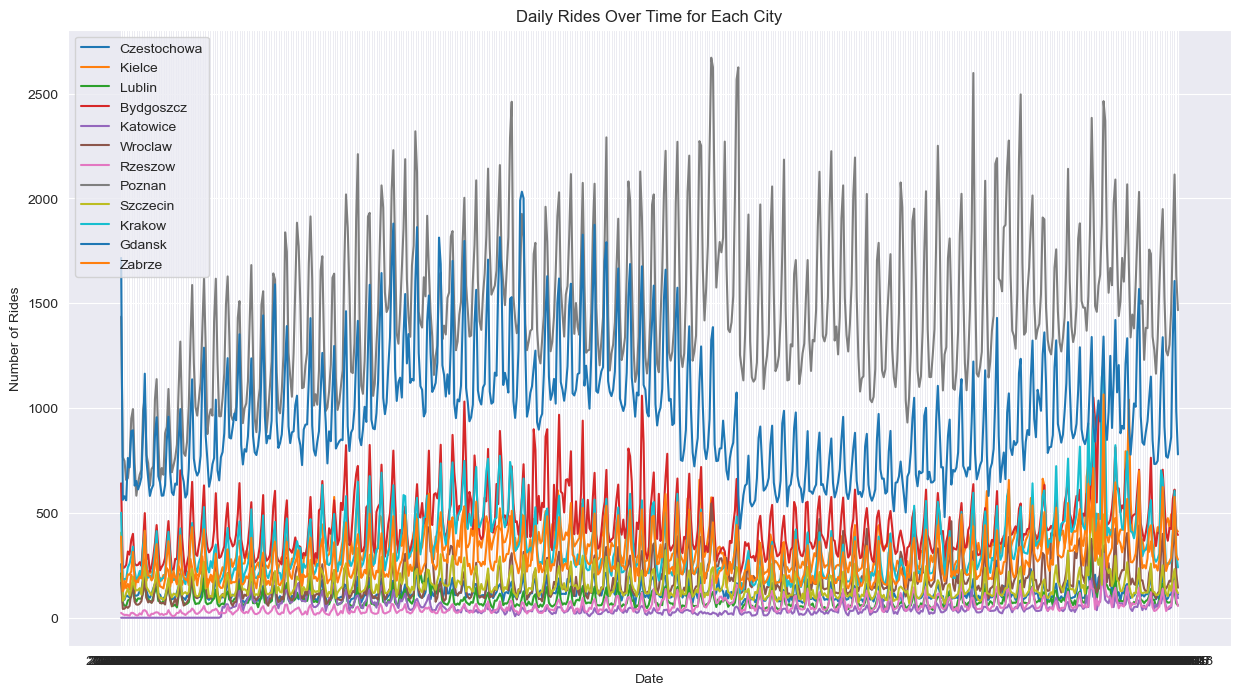

Budget Range: 7070.65€ - 14141.31€
Expected Rides Range: 21211.96 - 42423.92
Expected Revenue Range: 127271.77€ - 254543.54€
ROI Range: 800.00% - 3500.00%
Minimum budget for a measurable impact: 31817943.00 €


In [21]:

# Check the structure and content
print(df.info())
print(df.head())

# Visualize rides over time for each city
plt.figure(figsize=(15, 8))
for city in df.columns[1:]:
    plt.plot(df.index, df[city], label=city)
plt.title('Daily Rides Over Time for Each City')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

# Calculate the total rides for all cities
total_rides = df.sum().sum()

# Assuming CPM and CPA benchmarks
cpm_low, cpm_high = 2, 4
cpa_low, cpa_high = 6, 12

# Calculate the budget range
impressions_needed = total_rides  # Total impressions for all cities
budget_low = impressions_needed * cpm_low / 1000  # CPM to cost per impression
budget_high = impressions_needed * cpm_high / 1000  # CPM to cost per impression

# Calculate the expected number of rides
expected_rides_low = impressions_needed * (cpa_low / 100) * 0.10  # Assuming a 10% conversion rate
expected_rides_high = impressions_needed * (cpa_high / 100) * 0.10  # Assuming a 10% conversion rate

print(f"Budget Range: {budget_low:.2f}€ - {budget_high:.2f}€")
print(f"Expected Rides Range: {expected_rides_low:.2f} - {expected_rides_high:.2f}")

# Assuming the average profit per ride is 6€
average_profit_per_ride = 6
expected_revenue_low = expected_rides_low * average_profit_per_ride
expected_revenue_high = expected_rides_high * average_profit_per_ride

roi_low = (expected_revenue_low - budget_high) / budget_high * 100
roi_high = (expected_revenue_high - budget_low) / budget_low * 100

print(f"Expected Revenue Range: {expected_revenue_low:.2f}€ - {expected_revenue_high:.2f}€")
print(f"ROI Range: {roi_low:.2f}% - {roi_high:.2f}%")

# Calculate the average cost per ride in the industry benchmark range
min_cpa = 6  # minimum cost per ride
max_cpa = 12  # maximum cost per ride
avg_cpa = (min_cpa + max_cpa) / 2

# Estimate the minimum budget needed for a measurable impact
min_budget = avg_cpa * total_rides  # assuming all cities are targeted

print(f"Minimum budget for a measurable impact: {min_budget:.2f} €")